In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake.csv to fake.csv


In [ ]:
df = pd.read_csv('fake.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dt

In [ ]:

df = df[['title', 'text']].dropna()
df['content'] = df['title'] + ' ' + df['text']
print(df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                             content  
0   Donald Trump Sends Out Embarrassing New Year’...  
1   Drunk Bragging Trump Staffer Started Russian ...  
2   Sheriff David Clarke Becomes An Internet Joke...  
3   Trump Is So Obsessed He Even Has Obama’s Name...  
4   Pope Francis Just Called Out Donald Trump Dur..

In [ ]:
df['label'] = df['title'].apply(lambda x: 1 if 'fake' in x.lower() else 0)
print(df['label'].value_counts())


label
0    23050
1      431
Name: count, dtype: int64


In [ ]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text
df['content'] = df['content'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X = vectorizer.fit_transform(df['content']).toarray()
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9853097721950181
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4609
           1       0.85      0.26      0.40        88

    accuracy                           0.99      4697
   macro avg       0.92      0.63      0.70      4697
weighted avg       0.98      0.99      0.98      4697



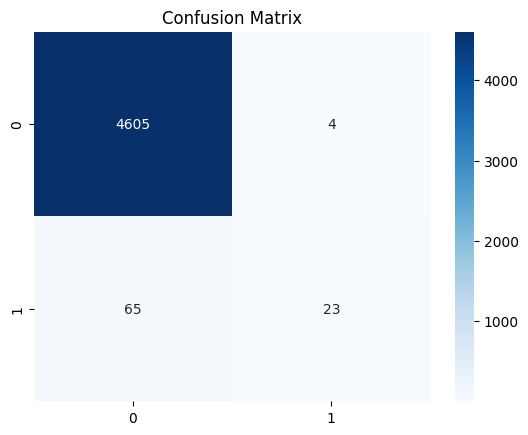

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
user_news = input("Enter the news article or headline: ")
print("\nNews Content:")
print(user_news)
def clean_input_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single letters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single letters at start
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Clean the user input
cleaned_news = clean_input_text(user_news)

# Transform the cleaned text using the vectorizer
transformed_news = vectorizer.transform([cleaned_news]).toarray()

# Make prediction
prediction = model.predict(transformed_news)

# Display the result
print("\nPrediction:")
if prediction[0] == 1:
    print("This news is predicted to be FAKE.")
else:
    print("This news is predicted to be REAL.")


Enter the news article or headline: Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES)

News Content:
Racist Alabama Cops Brutalize Black Boy While He Is In Handcuffs (GRAPHIC IMAGES)

Prediction:
This news is predicted to be REAL.
